In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from tqdm import tqdm
from matplotlib.colors import LogNorm
#import matplotlib.pylab as plt
from scipy import stats

In [4]:
df = pd.read_csv("run0115_git_det37_tier3_table.txt", sep=" ", header=0)

In [5]:
df.head()

energy[keV]  AoE[a.u.]  globalflag[a.u.]  adc-ch[.]  config-id[.]
0     2102.660   0.034031                 0         37             0
1      462.760   0.034562                 0         37             0
2      264.270   0.021744                 0         37             0
3      254.004   0.035939                 0         37             0
4     1177.500   0.015630                 0         37             0

In [6]:
l = len(df)
energy = df[df.columns[0]]
AoE = df[df.columns[1]]

In [7]:
mean = np.mean(AoE)
print(mean)
median = np.median(AoE)

0.03146639693856553


In [10]:
from matplotlib import gridspec

fig, axs = plt.subplots(1,2, figsize=(15,6), facecolor='w', edgecolor='k', gridspec_kw={'width_ratios': [1, 3]})


Aoenorm = AoE/0.034484682646538325

sns.histplot(ax=axs[0], data=Aoenorm, bins=100, log_scale=False, element="step", fill=False, color='r', label='A/E')
axs[0].set_xlabel('A/E [a.u.]')
axs[0].set_ylabel('counts')
axs[0].set_ylim(0,2e4)
axs[0].set_xlim(0,2)
axs[0].set_yticks([0,5e3,1e4,1.5e4])
axs[0].grid()
axs[0].legend()

#Energy spectrum
sns.histplot(ax=axs[1], data=energy, bins=10000, log_scale=False, element="step", fill=False, color='blue', label='Energy')
axs[1].set_xlabel('Energy [keV]')
axs[1].axvline(84, color='violet', label='domiannt line 84 keV')
axs[1].grid()
axs[1].legend()

fig = plt.figure(figsize=(15,6))
sns.histplot(data=energy, bins=1000, log_scale=False, element="step", fill=False, color='blue', label='Energy')
plt.xlabel('Energy [keV]')
plt.xlim(0,3000)
plt.yscale('log')
plt.axvline(240)
plt.grid()
plt.savefig('Th-spectra.pdf')

fig2 = plt.figure(figsize=(15,6))
sns.histplot(data=Aoenorm, bins=500, log_scale=False, element="step", fill=False, color='red', label='A/E')
plt.xlabel('A/E [a.u.]')
plt.grid()
plt.savefig('AoE-spectra.pdf')



126.898


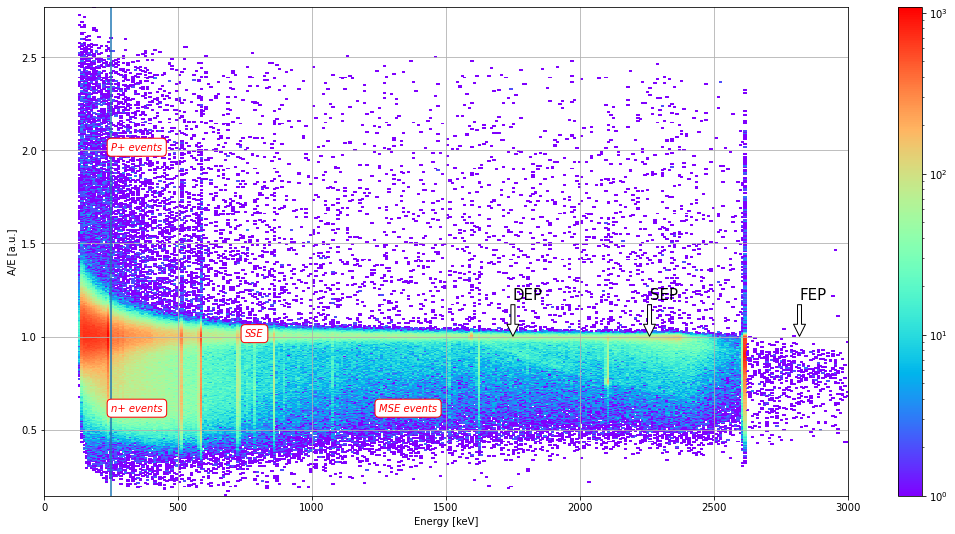

In [11]:
import matplotlib as mpl
import matplotlib.pylab as plt

fig = plt.figure(figsize=(18,9))
x, y = np.asarray(energy), np.asarray(Aoenorm)
plt.hist2d(x, y, bins=(500, 500),  norm=mpl.colors.LogNorm(), cmap='rainbow')
#plt.scatter(x, res , c=z, s=2, alpha=0.1,  norm=LogNorm(vmin=z.min(), vmax=z.max()), cmap='hsv')

plt.colorbar()
plt.xlim(0,3000)
#plt.ylim(0,)
plt.ylabel('A/E [a.u.]')
plt.xlabel('Energy [keV]')
plt.annotate('DEP', xy =(1750, 1), xytext =(1750, 1.2), arrowprops = dict(facecolor ='white', shrink = 0.01), fontsize=15)
plt.annotate('SEP', xy =(2260, 1), xytext =(2260, 1.2), arrowprops = dict(facecolor ='white', shrink = 0.01), fontsize=15)
plt.annotate('FEP', xy =(2820, 1), xytext =(2820, 1.2), arrowprops = dict(facecolor ='white', shrink = 0.01),fontsize=15)

plt.text(750, 1, ("SSE"), fontsize=10, color='r', style='oblique', 
        bbox=dict(facecolor='w', edgecolor='r', boxstyle='round,pad=0.4'))

plt.text(1250, 0.6, ("MSE events"), fontsize=10, color='r', style='oblique', 
        bbox=dict(facecolor='w', edgecolor='r', boxstyle='round,pad=0.4'))

plt.text(250, 2, ("P+ events"), fontsize=10, color='r', style='oblique', 
        bbox=dict(facecolor='w', edgecolor='r', boxstyle='round,pad=0.4'))

plt.text(250, 0.6, ("n+ events"), fontsize=10, color='r', style='oblique', 
        bbox=dict(facecolor='w', edgecolor='r', boxstyle='round,pad=0.4'))

plt.axvline(250)
plt.grid(True)
#plt.title("GERDA-run0115")
#plt.legend()
plt.savefig('Gerdanorm.pdf')
plt.savefig('Gerdanorm.png', dpi=300)


#contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=3)


In [ ]:
#plt.hist(A1s, bins=100, histtype=u'step', density=True, color='blue', label='895-925 keV')
#sns.histplot(data=A2s, bins=100, log_scale=False, element="step", fill=False, color='red', label='100-130 keV')

mean red-chi squared =  2.5954682341076176
0.010321955221895447
0.01392180852481246
1045


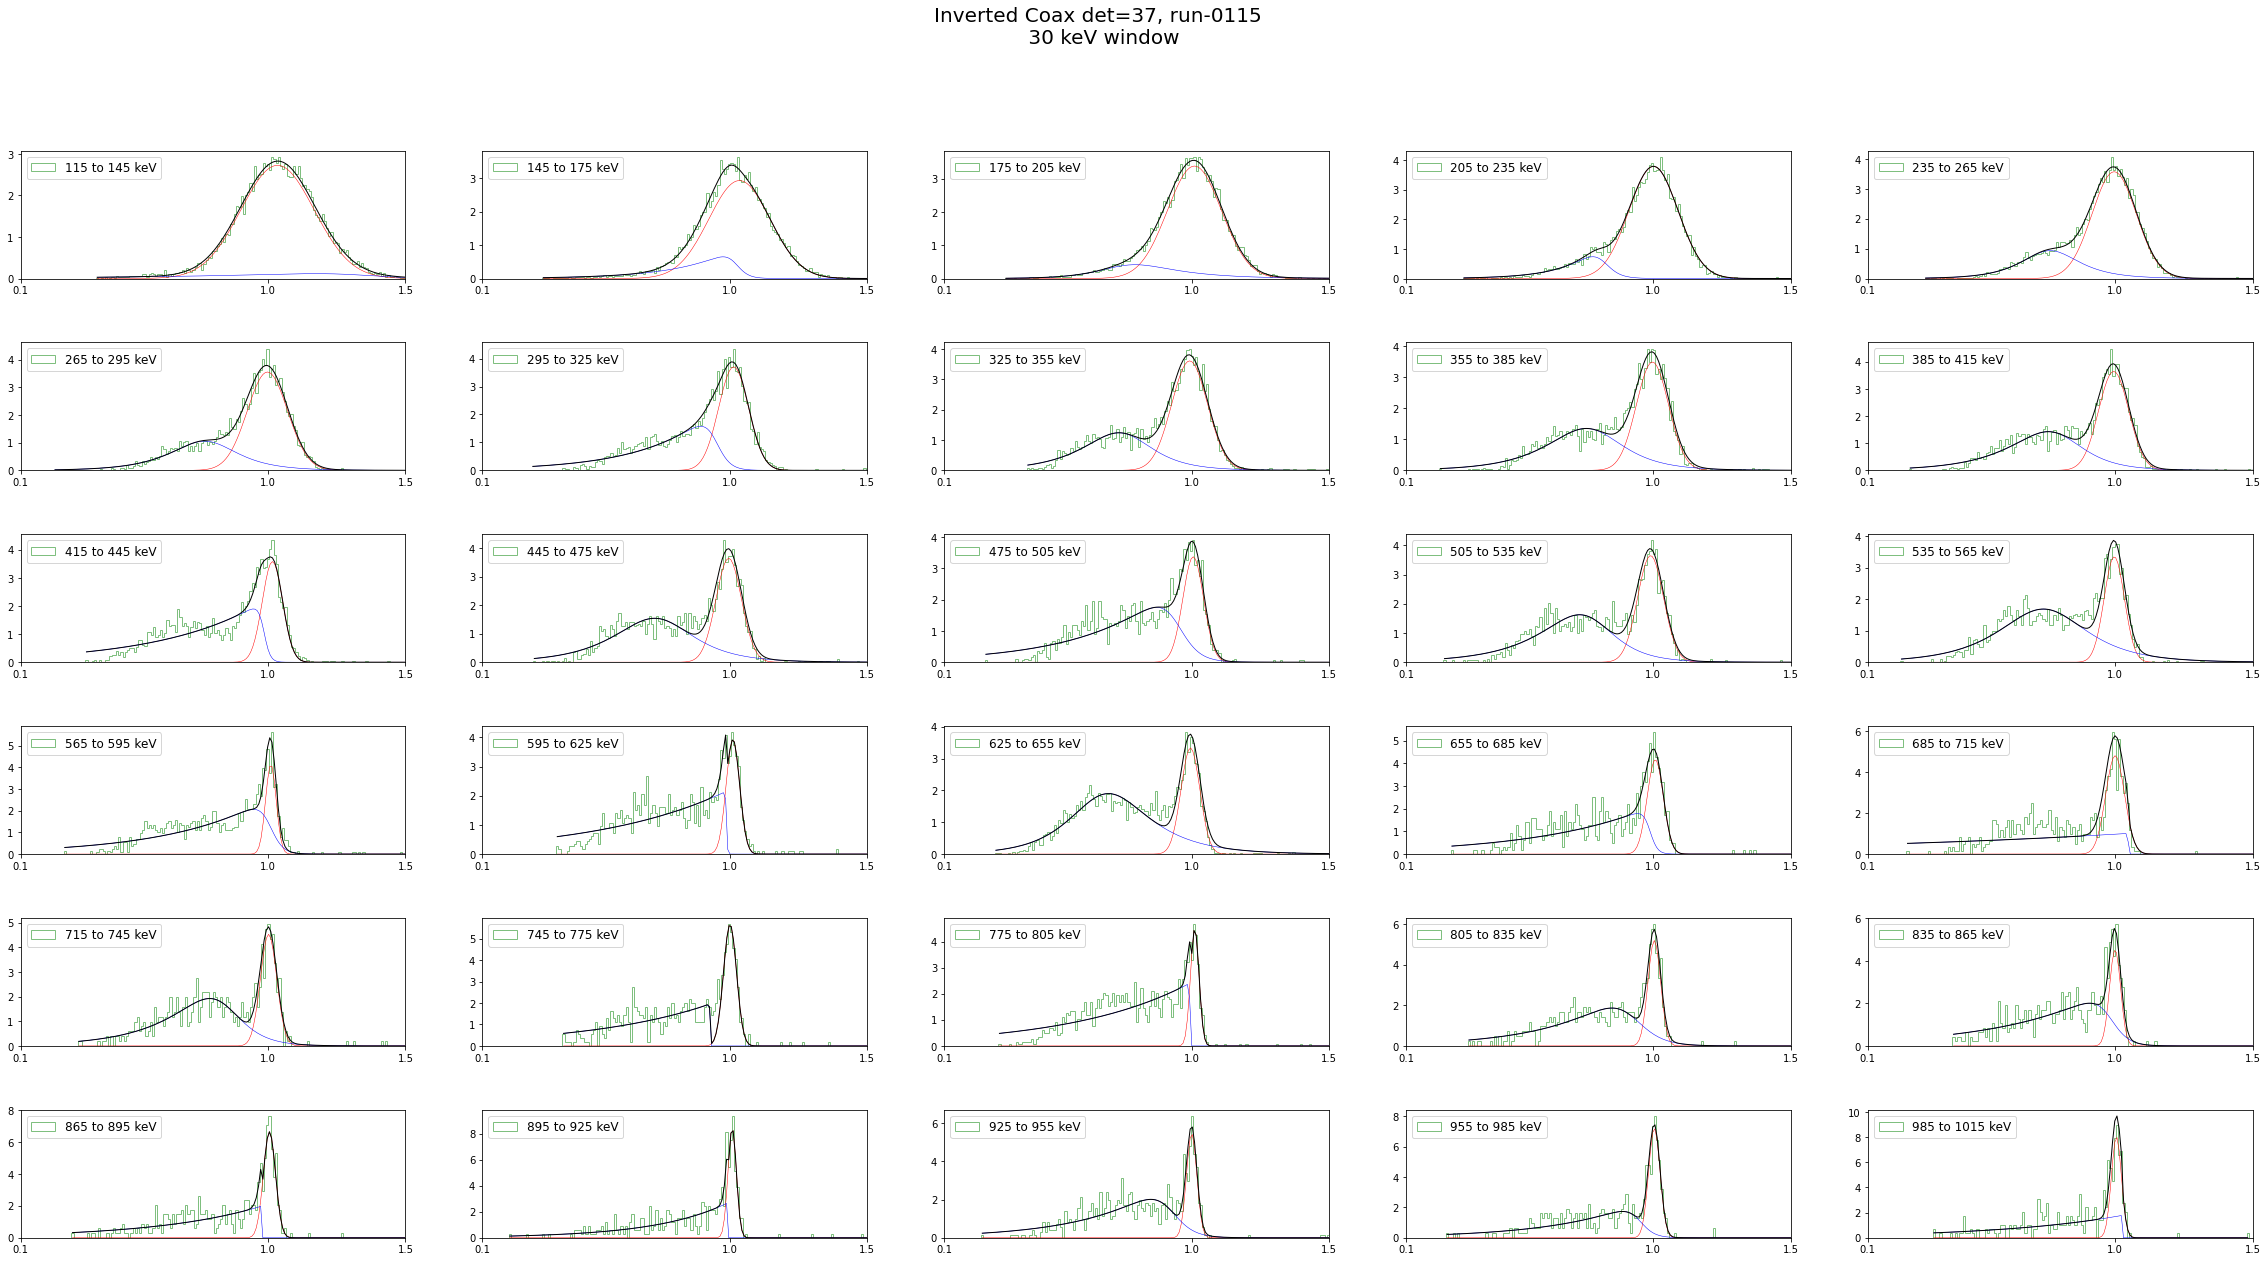

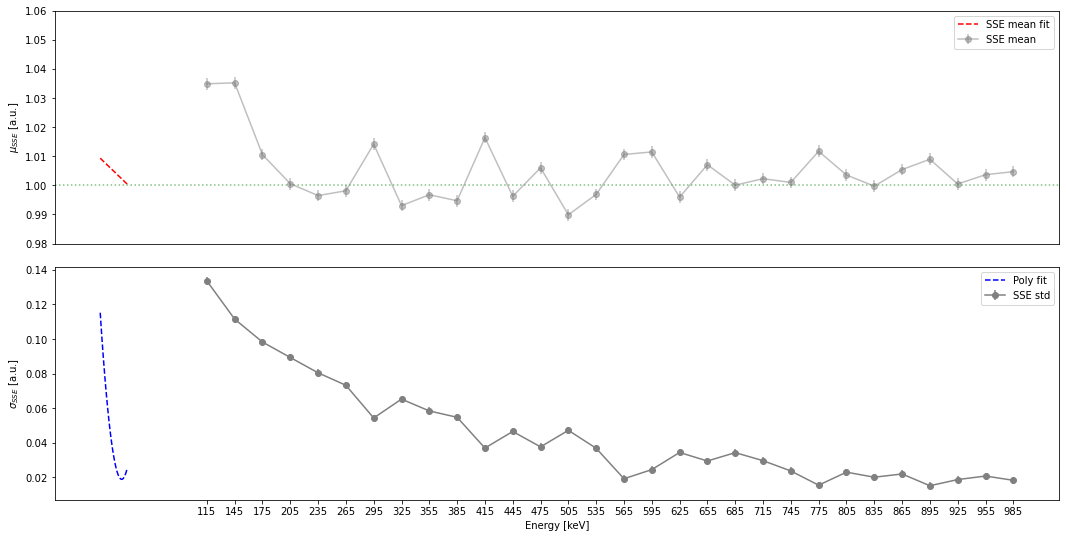

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from scipy import stats
from scipy.optimize import curve_fit
from lmfit.models import GaussianModel, ConstantModel
from lmfit import Model

#------------------------------------------------------------------------------------------------------------------
df = pd.read_csv("data/run0115_git_det37_tier3_table.txt", sep=" ", header=0)
df.head()
l = len(df)
energy = df[df.columns[0]]
meanpeak = 0.03466457684338998
AoE = df[df.columns[1]]/meanpeak


#-------------------------------------------------------
A , B, w = 115, 145, 30           #start - end - energy window  
#n = 500
binw = 0.008      #bin width 0.008 
#------------------------------- --------------------------------------------------------------- Models
def gauss(x, amp, center, sigma):
    return amp/(np.sqrt(2*np.pi))/sigma*(np.exp(-0.5*((x-center)/sigma)**2))
def tail(x, m, f, l, d, t):
    return m * (np.exp(f*(x-l)+d)) / (np.exp((x-l)/t)+1)
def fexpo(x, f, a):
    return exp(f * x + a)
def totalfit(x, ampl, mu, std, m, f, l, t):
    return gauss(x, ampl, mu, std) + tail(x, m, f, l, 0, t)
#--------------------------------------------------------------------------------------------- Figure settings
fig, axs = plt.subplots(6,5, figsize=(40,20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace = 0.2)
axs = axs.ravel()
#--------------------------------------------------------------------------------------------- Fitting parameters
chi = []
means = []
meanstot = []
stds  =  []
stdtot = []
xticks = []
centroid_list = []
#------------------------------------------------------- data extraction
for j in range(30):
    data = []
    for i in range(len(energy)):
        if energy[i] > A and energy[i]< B:
            data.append(AoE[i])
    xdata = np.asarray(data)
#-------------------------------------------------------
#------------------------------------------------------- bins and centroid
    b = len(np.arange(min(xdata), max(xdata) + binw, binw))
    y,x,_= axs[j].hist(xdata, \
                       bins = b, \
                       histtype=u'step', density=True, alpha=0.5, color='green', \
                       label='%.f to %.f keV'%(A, B))

    x = (x[1:]+x[:-1])/2    
    centroid = x[np.argmax(y)]
    centroid_list.append(centroid)
#-------------------------------------------------------
    
#------------------------------------------------------- Gaussian model        
    model1 = Model(gauss, prefix='g_')
    paramslm = model1.make_params(g_amp=len(xdata), g_center=centroid, g_sigma=centroid*0.01)
    paramslm['g_amp'].min = 0.
    paramslm['g_center'].min = centroid * 0.9
    paramslm['g_center'].max = centroid * 1.1
    paramslm['g_sigma'].min = 0
    paramslm['g_sigma'].max = 1
    
    result1 = model1.fit(y[(x>centroid*0.985) & (x<centroid*1.2)], paramslm, x=x[(x>centroid*0.985) & (x<centroid*1.2)])
    means.append(result1.params['g_center'].value)
    stds.append(result1.params['g_sigma'].value)
    #xticks.append('%.f - %.f'%(A,B))
    xticks.append(A)

#-------------------------------------------------------

#------------------------------------------------------- Expo
    model3 = Model(fexpo, prefix='e_') 
    paramslmex = model3.make_params(e_f=1, e_a=1)
    
    expo_min = result1.params['g_center'].value - 25*result1.params['g_sigma'].value
    expo_max = result1.params['g_center'].value - 4*result1.params['g_sigma'].value
    
    fmin = result1.params['g_center'].value - 25*result1.params['g_sigma'].value
    fmax = result1.params['g_center'].value + 10*result1.params['g_sigma'].value

    result3 = model3.fit(y[x>fmin], paramslmex, x=x[x>fmin])    
#-------------------------------------------------------

#------------------------------------------------------- The tail(from direct model)
    enteries = 0
    for i in range(len(xdata)):
        if (xdata[i] < result1.params['g_center'].value  - 3*result1.params['g_sigma'].value) & \
        (xdata[i] > result1.params['g_center'].value  - 25*result1.params['g_sigma'].value):
            enteries = enteries +1
    model2 = Model(tail, prefix='t_') 
    paramslm2 = model2.make_params(t_m= enteries * result1.params['g_center'].value, \
                              t_f= result3.params['e_f'].value, \
                              t_l= result1.params['g_center'].value - 1.5 * result1.params['g_sigma'].value, \
                              t_d= 0 ,\
                              t_t= 0.2 * result1.params['g_sigma'].value )
    #paramslm2['t_m'].min  = 0.
    #paramslm2['t_m'].max  = 10  * paramslm2['t_m']
    #paramslm2['t_f'].min  = 0.2 * result3.params['e_f'].value
    #paramslm2['t_f'].max  = 5.0 * result3.params['e_f'].value
    #paramslm2['t_l'].min  = 0.5 * paramslm2['t_l']
    #paramslm2['t_l'].max  = 2.0 * paramslm2['t_l']
    #paramslm2['t_l'].vary = False
    paramslm2['t_d'].vary = False
    #paramslm2['t_t'].min  = 0.
    #paramslm2['t_t'].max  = 2.0 * result1.params['g_sigma'].value
    
    min_tail = result1.params['g_center'].value - 25 * result1.params['g_sigma'].value
    max_tail = result1.params['g_center'].value + 10 * result1.params['g_sigma'].value
    
    result2 = model2.fit(y[(x>min_tail) & (x<max_tail)], paramslm2, x=x[(x>min_tail) & (x<max_tail)])
#-------------------------------------------------------
    
    modeltot = Model(totalfit, prefix='tot_') 
    paramstot = modeltot.make_params(tot_ampl=result1.params['g_amp'].value, \
                                     tot_mu = result1.params['g_center'].value, \
                                     tot_std = result1.params['g_sigma'].value, \
                                     tot_m = result2.params['t_m'].value, \
                                     tot_f = result2.params['t_f'].value, \
                                     tot_l = result2.params['t_l'].value, \
                                     tot_t = result2.params['t_t'].value)
    
    paramstot['tot_ampl'].min  = 0.95 * result1.params['g_amp'].value
    paramstot['tot_ampl'].max  = 1.05 * result1.params['g_amp'].value

    paramstot['tot_mu'].min  = 0.995 * result1.params['g_center'].value
    paramstot['tot_mu'].max  = 1.005 * result1.params['g_center'].value
    
    paramstot['tot_std'].min  = 0.98 * result1.params['g_sigma'].value
    paramstot['tot_std'].max  = 1.02 * result1.params['g_sigma'].value
    
    paramstot['tot_m'].min  = 0
    paramstot['tot_m'].max  = 10 * result2.params['t_m'].value
    
    paramstot['tot_f'].min  = 0.2 * result2.params['t_f'].value
    paramstot['tot_f'].max  = 5.0 * result2.params['t_f'].value
    
    paramstot['tot_l'].min  = 0.5 * result2.params['t_l'].value
    paramstot['tot_l'].max  = 2.0 * result2.params['t_l'].value
    
    paramstot['tot_t'].min  = 0
    paramstot['tot_t'].max  = 2.0 * result1.params['g_sigma'].value
    
    #resulttot = modeltot.fit(y, paramstot, x=x, weights=np.sqrt(1.0/np.std(AoE)))
    weight = 1/np.std(xdata)
    resulttot = modeltot.fit(y, paramstot, x=x, weights=weight)
    
    chi.append(resulttot.redchi)
    meanstot.append(resulttot.params['tot_mu'].value)
    stdtot.append(resulttot.params['tot_std'].value)
    #------------------------------------------------------- Total fit
    SSE = gauss(x, resulttot.params['tot_ampl'].value, resulttot.params['tot_mu'].value, resulttot.params['tot_std'].value)
    MSE = tail(x, resulttot.params['tot_m'].value, resulttot.params['tot_f'].value, \
               resulttot.params['tot_l'].value, 0, resulttot.params['tot_t'].value)
#-------------------------------------------------------
#------------------------------------------------------- Plotting
    axs[j].plot(x, SSE, color='r', lw=0.5)#, label='Gaussian')
    axs[j].plot(x, MSE, color='b', lw=0.5)#, label='Tail')
    axs[j].plot(x, resulttot.best_fit, color='k', lw=1)#, label='Fit')
    axs[j].legend(loc=2, prop={'size': 12})
    axs[j].set_xlim(0.5,1.5)
    axs[j].set_xticks([0.1,1.0,1.5])
    A = A + w
    B = B + w